# Classificação de Saúde Fetal com Machine Learning
---

A taxa de mortalidade infantil é uma preocupação significativa tanto para a saúde pública quanto privada. Infelizmente, há um alto risco de um recém-nascido morrer antes de completar seu primeiro ano de vida. Diversos fatores podem contribuir para z problema. De acordo com o SEADE (Sistema Estadual de Análise de Dados), as principais causas de mortalidade infantil incluem afecções originadas no período perinatal, malformações congênitas, partos de alto risco, doenças infecciosas e parasitárias e doenças do aparelho respiratório. Juntas, essas causas foram x por 88% dos óbitos em 2020 e 90% em 2019.

<p align=center>
<img src="https://img.freepik.com/fotos-gratis/pes-do-bebe-nas-maos-da-mae_1112-1535.jpg?w=1060&t=st=1682879360~exp=1682879960~hmac=06f076d2d54b77d69458ef13da6d676ef72e39cacb7afb308dd1f5a78203d7dc" width="70%"></p>

A intensão é aplicar um modelo de machine learning em um conjunto com os dados fornecidos pelo Cardiotocograma (CTG), capaz de fazer uma previsão de mortes evitáveis de fetos, que auxiliaria profissionais da área obstétrica a identificar partos com alto potencial de risco, desta forma será possível um diagnóstico mais ágil e preciso, promovendo uma redução na taxa de mortalidade.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## Importando os Dados

É importante definir quais fontes de dados são relevantes para o projeto e selecionar quais dados precisam ser coletados.  Alguns fatores importantes a serem considerados incluem: a confiabilidade das fontes de dados, o volume de dados, a frequência de atualização e a segurança dos dados. É essencial garantir que os dados sejam coletados e avaliados corretamente para assegurar a confiabilidade dos resultados do projeto.


In [ ]:
# Importando os pacotes necessarios
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import seaborn as sns
from rich.console import Console
from rich import print
from rich.panel import Panel
from rich.table import Table
%matplotlib inline

* Os dados utilizados neste projeto foram disponibilizados originalmente pelos

1.   Item da lista
2.   Item da lista

pesquisadores responsáveis pelo [SisPorto 2.0](https://onlinelibrary.wiley.com/doi/10.1002/1520-6661(200009/10)9:5%3C311::AID-MFM12%3E3.0.CO;2-9), um programa de análise automatizada de cardiotocogramas. Para acessar esses dados, é possível adquiri-los na plataforma Kaggle.

<p align=center>
<img src="https://upload.wikimedia.org/wikipedia/commons/7/7c/Kaggle_logo.png?20140912155123" width="30%"></p>

* Este conjunto de dados contém 2126 registros de características extraídas de exames de cardiotocograma.

In [ ]:
# Importar warnings filter
from warnings import simplefilter
# Ignorar futuros warnings
simplefilter(action='ignore', category=FutureWarning)

In [ ]:
df_health = pd.read_csv('/content/fetal_health.csv')
df_health.index = np.arange(1, len(df_health)+1)

Com os dados importados para dentro de uma estrutura *Dataframe* - e não havendo a necessidade de mais nenhum ajuste ou configuração nesta etapa, pode-se iniciar uma análise exploratória dos dados a fim de preparar um modelo de *Machine Learning*.



```
# Isto está formatado como código
```

## Dicionário de Variaveis
Um guia que fornece descrições conceituais de cada variável em nosso conjunto de dados.




* `baseline value`:a frequência cardíaca fetal (FCF);
* `accelerations`: Número de acelerações por segundo;
* `fetal_movement`: Número de movimentos fetais por segundo;
* `uterine_contractions`: Número de contrações uterinas por segundo;
* `light_decelerations`: Número de desacelerações leves por segundo;
* `severe_decelerations`: Número de desacelerações severas por segundo;
* `prolongued_decelerations`: Número de desacelerações prolongadas por segundo;
* `abnormal_short`: Porcentagem de tempo com variabilidade anormal de curto prazo;
* `mean_value_of_short_term_variability`:Valor médio da variabilidade de curto prazo;
* `percentage_of_time`:Porcentagem de tempo com variabilidade anormal de longo prazo;
* `mean_value_of_long`: Valor médio da variabilidade de longo prazo;
* `histogram_width`: Largura do histograma feito usando todos os valores de um registro;
* `histogram_min`:O valor mínimo da FCF no histograma;
* `histogram_max`: O valor maximo da FCF no histograma;
* `histogram_number_of_peaks`:o número de picos distintos no histograma da FCF;

* `histogram_number_of_zeroes`: o número de vezes que a FCF chega a zero no histograma.
* `histogram_mode`: o valor mais comum no histograma da FCF;
* `histogram_mean`: o valor médio da FCF no histograma.
* `histogram_median`: o valor mediano da FCF no histograma.
* `histogram_variance`: uma medida da dispersão da distribuição da FCF no histograma.

* `histogram_tendency` : uma medida da dispersão da distribuição da FCF no histograma.

* `fetal_health`: saúde fetal (1 — normal; 2 — Suspeito; 3 — Patológico).

## Análise exploratória de dados
Com os dados devidamente coletados, a próxima etapa é a análise exploratória de dados. Nessa etapa, empregamos diversas técnicas e ferramentas para entender melhor os dados coletados, identificando possíveis anomalias, relacionamentos e tendências nos dados. Esse processo nos permite obter uma visão mais completa e detalhada dos dados, permitindo-nos compreender melhor o comportamento das variáveis e suas interações.

* Antes de iniciar a análise dos dados, vamos verificar o nosso dataset, analisando as 5 primeiras entradas.

In [ ]:
df_health.head() # verificando as 5 primeiras entradas

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
1,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
2,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
3,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
4,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
5,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


### **1. Qual é o tamanho, porcentagem de valores ausentes e os tipos das variáveis no conjunto de dados?**

Durante a etapa de análise exploratória de dados, é fundamental compreender o conjunto de dados em questão, tais como tamanho, porcentagem de valores ausentes e tipos de variáveis. O tamanho do conjunto de dados é uma informação fundamental para entender a sua extensão e, consequentemente, a sua complexidade. A porcentagem de valores ausentes indica a proporção de dados faltantes em relação ao tamanho do conjunto de dados, o que pode indicar possíveis problemas de coleta de dados ou de armazenamento.  Já os tipos das variáveis indicam a natureza dos dados, o que pode ser útil para entender melhor as informações contidas no conjunto de dados e escolher as melhores técnicas de análise. Essas informações são cruciais para determinar a qualidade dos dados e garantir a precisão das análises realizadas.

In [ ]:
table =  Table(title='Informações das Variáveis')
table.add_column('Variable_name', justify='center')
table.add_column('Data_type', justify='center')
table.add_column('Unique_value', justify='center')
table.add_column('Missing_percentage', justify='center')
for column in df_health.columns:
  table.add_row(f'{column}', f'{df_health[column].dtypes}',
                f'{len(df_health[column].unique())}',
                f'{(df_health[column].isnull().sum())*100}')


In [ ]:
print("Entradas:\t {}".format(df_health.shape[0]))
print("Variáveis:\t {}\n".format(df_health.shape[1]))
print(table)

Entradas:        2126

Variáveis:       22

                                        Informações das Variáveis                                         
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┓
┃                     Variable_name                      ┃ Data_type ┃ Unique_value ┃ Missing_percentage ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━┩
│                     baseline value                     │  float64  │      48      │         0          │
│                     accelerations                      │  float64  │      20      │         0          │
│                     fetal_movement                     │  float64  │     102      │         0          │
│                  uterine_contractions                  │  float64  │      16      │         0          │
│                  light_decelerations                   │  float64  │      16      │         0          │
│                  severe_decelerations                  │  float64  │      2       │         0          │
│                prolongued_decelerations                │  float64  │      6       │         0          │
│            abnormal_short_term_variability             │  float64  │      75      │         0          │
│          mean_value_of_short_term_variability          │  float64  │      57      │         0          │
│ percentage_of_time_with_abnormal_long_term_variability │  float64  │      87      │         0          │
│          mean_value_of_long_term_variability           │  float64  │     249      │         0          │
│                    histogram_width                     │  float64  │     154      │         0          │
│                     histogram_min                      │  float64  │     109      │         0          │
│                     histogram_max                      │  float64  │      86      │         0          │
│               histogram_number_of_peaks                │  float64  │      18      │         0          │
│               histogram_number_of_zeroes               │  float64  │      9       │         0          │
│                     histogram_mode                     │  float64  │      88      │         0          │
│                     histogram_mean                     │  float64  │     103      │         0          │
│                    histogram_median                    │  float64  │      95      │         0          │
│                   histogram_variance                   │  float64  │     133      │         0          │
│                   histogram_tendency                   │  float64  │      3       │         0          │
│                      fetal_health                      │  float64  │      3       │         0          │
└────────────────────────────────────────────────────────┴───────────┴──────────────┴────────────────────┘

Com base nas informações fornecidas, podemos observar que:

* A maioria dos dados em nosso dataset é do tipo `float`

* é possivel indentificar que a variavel `fetal_health` é o nosso atributo target.

* Além disso, podemos constatar que não há valores ausentes presentes no conjunto de dados. Isso significa que não há necessidade de realizar limpeza de dados para remover valores ausentes ou preencher valores faltantes. Essa é uma boa notícia, pois nos permite economizar tempo e recursos que seriam necessários para tratar valores ausentes.




### **2. O dataset está balanceado?**

Quando se utiliza machine learning, uma das questões mais importantes a serem consideradas é se o conjunto de dados em questão está balanceado ou não. A distribuição dos dados pode ter um grande impacto no desempenho do modelo, e o desequilíbrio dos dados é um problema comum em muitos conjuntos de dados. A questão do equilíbrio dos dados é crucial para determinar as técnicas de modelagem adequadas a serem empregadas e as estratégias de pré-processamento que podem ser necessárias para lidar com esses desequilíbrios.

* Ao analisarmos o gráfico de distribuição da saúde fetal abaixo, podemos observar que a maioria dos fetos (cerca de 77,85% do total, representando 1655) apresentam-se em estado normal de saúde, enquanto apenas 13,38% dos fetos (295) apresentam suspeita de patologia e 8,28% dos fetos (176) possuem estado patológico confirmado.o. Esses números revelam uma grande disparidade entre as categorias.

In [ ]:
normal= (df_health.fetal_health.value_counts(normalize=True)*100).values[0]
suspicious = (df_health.fetal_health.value_counts(normalize=True)*100).values[1]
pathological = (df_health.fetal_health.value_counts(normalize=True)*100).values[2]

% normal: 77.85
% suspeita: 13.88
% Patológica: 8.28

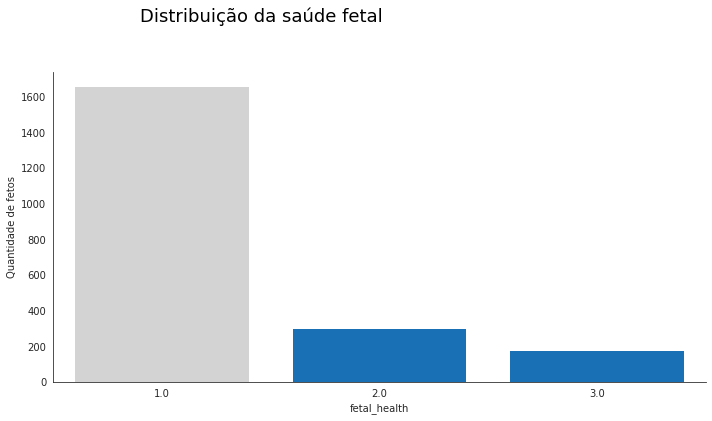

In [ ]:
gray_light = "#D3D3D3"
blue = '#0073CF'
gray_bar = '#333333'
fig, ax = plt.subplots(figsize=(10, 6), dpi=72)
sns.set_style("white")
sns.countplot(data=df_health, x='fetal_health', palette=[gray_light, blue, blue], linewidth=0, edgecolor="none", ax=ax)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.text(-0.1, 2000, 'Distribuição da saúde fetal', fontsize=18, fontweight='medium', va='bottom', color='black')
ax.set_ylabel('Quantidade de fetos')
ax.set_xlabel('fetal_health')
print(f'% normal: {normal.round(2)}\n% suspeita: {suspicious.round(2)}\n% Patológica: {pathological.round(2)}')
plt.tight_layout()

Portanto, é necessário um tratamento adequado na etapa de pré-processamento de dados para lidar com essa desproporção e garantir que o modelo de machine learning seja capaz de aprender corretamente com as duas classes.

### **3. Há *outliers* presentes?**


Ao utilizar o método describe() , é possível ver abaixo, que há indícios da presença de outliers.

In [ ]:
df_health.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


Para validar esta hipótese, realizamos uma análise dos boxplots das colunas `accelerations` e `light_decelerations`. Durante a análise,  conseguimos ver claramente que temos outliers presentes.

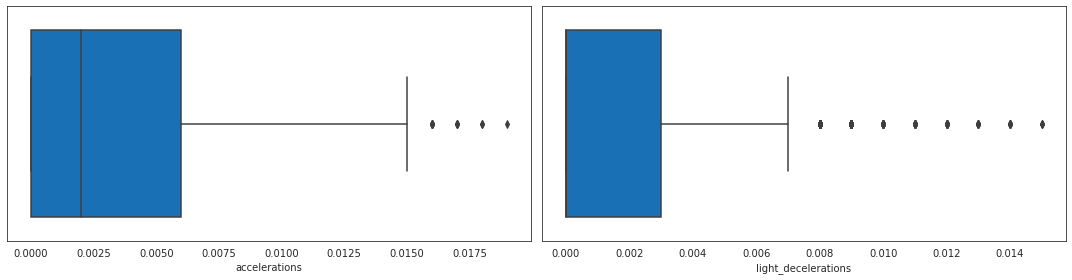

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(15,4), dpi=72)
sns.boxplot(data=df_health, x="accelerations", ax=ax[0],color=blue)
sns.boxplot(data=df_health, x="light_decelerations",  ax=ax[1], color=blue)
plt.tight_layout()

##  Pré-processamento de dados

Com base nos resultados da análise exploratória, podemos direcionar nossos esforços para o pré-processamento dos dados. Essa etapa inclui uma série de atividades que têm como objetivo preparar os dados para modelagem, tornando-os mais adequados para uso em modelos e algoritmos. As atividades que realizamos incluem limpeza dos dados, remoção de valores ausentes, padronização das unidades de medida, normalização e codificação de variáveis e entre outros.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import ADASYN

### **Padronização(Z-score)**

A padronização Z-score é uma técnica estatística utilizada para transformar uma distribuição de dados em uma distribuição com média zero e desvio padrão unitário. Essa técnica é aplicável a diversos tipos de dados e tem como principal objetivo permitir a comparação direta entre eles, independentemente de sua distribuição original.

A ideia por trás da padronização Z-score é que, ao converter os dados para um formato padrão, é possível avaliar o quão distante cada observação está da média da distribuição. Esse valor é chamado de "escore Z" e representa o número de desvios padrão pelo qual a observação está afastada da média. Dessa forma, é possível identificar quais observações estão mais próximas ou mais distantes da média e comparar a distribuição de dados de forma mais precisa.

## $$
z = \frac{x - \mu}{\sigma}
$$

In [ ]:
scaler = StandardScaler()
df_clean = scaler.fit_transform(df_health.iloc[:, :21].copy())

### **Separando entre Treino e Teste**
Para garantir um balanceamento adequado dos dados, é fundamental realizar a separação dos mesmos em conjuntos de treino e teste. Essa etapa preliminar é crucial, uma vez que permite avaliar se o balanceamento foi realizado de forma adequada.

* aqui podemos fazer o split no conjunto de treino para o conjunto de teste com Scikit-Learn.

In [ ]:
features = df_clean.copy()
target = df_health.fetal_health.values.copy()
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=0, stratify=target, shuffle=True)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1594, 21)

(532, 21)

(1594,)

(532,)

### **Balanceamento dos dados(ADASYN)**

ADASYN (Adaptive Synthetic Sampling) é uma técnica de balanceamento de dados utilizada no pré-processamento de dados em Machine Learning.

O problema de desbalanceamento de dados ocorre quando uma das classes de um conjunto de dados tem muito mais amostras do que a outra(s). Isso pode ser um problema para modelos de Machine learning, pois pode levar a uma predição imprecisa para a classe minoritária. ADASYN é uma técnica que pode ajudar a resolver esse problema.

A técnica funciona gerando amostras sintéticas para a classe minoritária, com base nas amostras existentes, de modo a equilibrar a distribuição de classes. A geração dessas amostras sintéticas é feita de forma adaptativa, ou seja, a quantidade de amostras sintéticas geradas para cada amostra original é proporcional à sua distância para os seus k vizinhos mais próximos pertencentes à classe majoritária.






















* Usando a biblioteca imblearn é possível aplicar facilmente essa técnica de balanceamento de dados.

In [ ]:
from imblearn.over_sampling import ADASYN
adasyn = ADASYN()
x_ada, y_ada = adasyn.fit_resample(x_train, y_train)

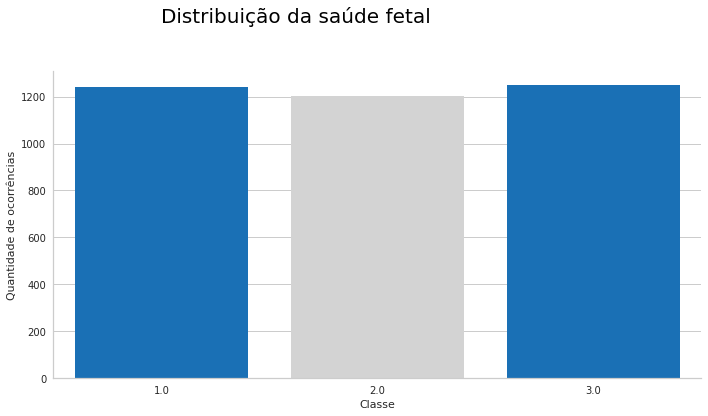

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6), dpi=72)
sns.set_style("white")
sns.countplot(x=y_ada, palette=['#0073CF', "#D3D3D3"], linewidth=0, edgecolor="none", ax=ax)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.text(-0, 1500, 'Distribuição da saúde fetal' ,
        fontsize=20, fontweight='medium',va='bottom', color='black')
ax.set_ylabel('Quantidade de ocorrências')
ax.set_xlabel('Classe')
plt.tight_layout()

In [ ]:
train = pd.DataFrame(x_ada, columns=df_health.columns[:21])
train['target'] = y_ada

##  Modelagem de Machine Learning

Depois do pré-processamento de dados, o próximo passo é a criação do modelo. Isso envolve a escolha do algoritmo de Machine learning mais adequado para o problema em questão e a definição dos parâmetros do modelo. A criação do modelo também inclui a divisão dos dados em conjuntos de treinamento e teste e a validação do modelo. Durante a validação, é importante garantir que o modelo esteja performando bem e que não esteja sofrendo de overfitting ou underfitting.


### Classificação com PyCaret - Wine

PyCaret é uma biblioteca open-source e low-code de Python que tem como objetivo reduzir o templo entre o ciclo entre uma hipótese e insights em experimentos com Machine Learning.

O PyCaret possibilita que Cientistas de Dados completem experimentos de ponta a ponta de forma rápida e eficiente. Em comparação com outras bibliotecas do tipo, o PyCaret traz o diferencial de ser low-code, isto é, demanda pouco código para que opere de forma robusta.

### Configurando o ambiente no PyCaret
Seguindo as boas práticas para desenvolvimento, vamos importar somente os módulos que vamos precisar, ao invés de importar a biblioteca inteira para utilizar meia dúzia de módulos.

In [ ]:
#@title
# instalando a biblioteca
!pip install pycaret -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 481.8/481.8 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 42.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 21.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 66.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.8/105.8 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 kB 16.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 kB 4.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━

In [ ]:
# importando os pacotes necessários
from pycaret.classification import setup, compare_models, models, create_model, predict_model
from pycaret.classification import tune_model, plot_model, evaluate_model, finalize_model
from pycaret.classification import save_model, load_model

* Aqui, vamos criar um classificador (clf), e vamos passar os dados, e a variável alvo.

In [ ]:
clf = setup(data=train, target='target')

,Description,Value
0,Session id,6025
1,Target,target
2,Target type,Multiclass
3,Target mapping,"1.0: 0, 2.0: 1, 3.0: 2"
4,Original data shape,"(3693, 22)"
5,Transformed data shape,"(3693, 22)"
6,Transformed train set shape,"(2585, 22)"
7,Transformed test set shape,"(1108, 22)"
8,Numeric features,21
9,Preprocess,True


### Comparando os Modelos
Vamos comparar diferentes modelos, para verificar a performance deles em nosso conjunto de dados, baseado na métrica de avaliação de nossa escolha.

Aqui, vamos preferir utilizar o recall como métrica de avaliação.

In [ ]:
best = compare_models(sort='Recall', n_select=5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9803,0.9962,0.9803,0.9810,0.9802,0.9704,0.9708,0.5900
lightgbm,Light Gradient Boosting Machine,0.9779,0.9983,0.9779,0.9785,0.9779,0.9669,0.9672,1.2950
xgboost,Extreme Gradient Boosting,0.9745,0.9978,0.9745,0.9749,0.9745,0.9617,0.9619,1.6200
rf,Random Forest Classifier,0.9718,0.9973,0.9718,0.9724,0.9717,0.9576,0.9580,1.0240
gbc,Gradient Boosting Classifier,0.9613,0.9965,0.9613,0.9620,0.9613,0.9420,0.9423,3.8290
dt,Decision Tree Classifier,0.9455,0.9595,0.9455,0.9457,0.9453,0.9182,0.9184,0.1030
knn,K Neighbors Classifier,0.9400,0.9836,0.9400,0.9458,0.9395,0.9101,0.9132,0.1030
ada,Ada Boost Classifier,0.8893,0.9540,0.8893,0.8924,0.8899,0.8340,0.8350,0.4410
lr,Logistic Regression,0.8851,0.9667,0.8851,0.8890,0.8858,0.8276,0.8288,0.7650
lda,Linear Discriminant Analysis,0.8569,0.9559,0.8569,0.8673,0.8579,0.7854,0.7888,0.0980


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [ ]:
# verificando o melhor modelo
print(best[0])

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=6025, verbose=0, warm_start=False)

### Hyperparameter Tuning

Utilizando o PyCaret também é extremamente fácil fazer a otimização dos parâmetros. Basta utilizar o método `tune_model` passando como parâmetro o modelo a ser otimizado e a métrica pela qual você quer otimizar.

In [ ]:
tuned_et = tune_model(best[0], optimize='Recall')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9228,0.9878,0.9228,0.9267,0.9223,0.8842,0.8864
1,0.9614,0.9961,0.9614,0.9615,0.9612,0.9421,0.9423
2,0.9305,0.9893,0.9305,0.9330,0.9302,0.8957,0.8972
3,0.9305,0.9860,0.9305,0.9334,0.9303,0.8957,0.8973
4,0.9421,0.9935,0.9421,0.9433,0.9419,0.9131,0.9139
5,0.9264,0.9909,0.9264,0.9285,0.9259,0.8895,0.8910
6,0.9264,0.9889,0.9264,0.9310,0.9261,0.8895,0.8919
7,0.9302,0.9852,0.9302,0.9334,0.9298,0.8954,0.8973
8,0.9496,0.9927,0.9496,0.9511,0.9495,0.9244,0.9253


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
# veriificando os parâmetros
print(tuned_et)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=6025, verbose=0, warm_start=False)

PyCaret facilita cada parte do processo de Machine Learning, e a visualização dos resultados não poderia ser diferente.

É muito prático plotar uma matriz de confusão dos resultados, por exemplo.

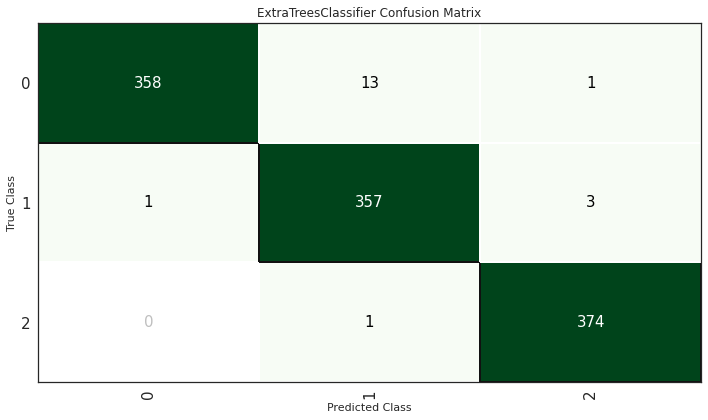

<Figure size 800x550 with 0 Axes>

In [ ]:
# plotando matriz de confusão
fig, ax = plt.subplots(figsize=(10, 6), dpi=72)
plot_model(tuned_et, plot='confusion_matrix')
plt.tight_layout()

Outra visualização extremamente importante é a de `feature_importances`. Essa visualização basicamente nos mostra o poder preditivo de cada variável para o nosso modelo.

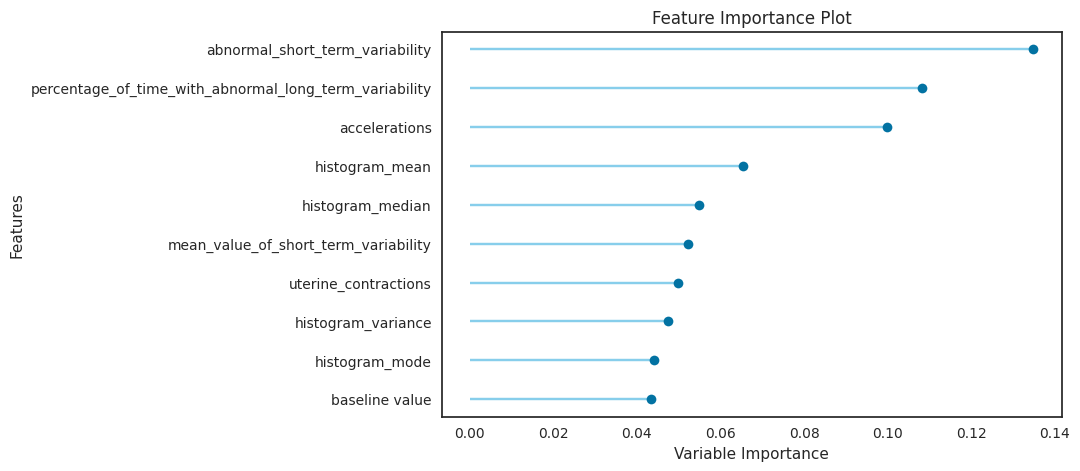

In [ ]:
# feature importances
plot_model(tuned_et, plot='feature')

### Finalizando o Modelo

Agora que já conseguimos treinar nosso modelo, podemos finalizar ele e  seguir para as previsões no nosso conjunto de testes.

In [ ]:
# finalizando o modelo
final_et = finalize_model(tuned_et)

## Avaliar o desempenho do modelo

A avaliação é a etapa onde testamos se nosso modelo é capaz de cumprir a missão que foi definida para ele. É nessa fase que utilizamos diferentes métricas e técnicas para avaliar a eficácia do modelo em relação aos dados de teste. Mas não é só isso! Também avaliamos se o modelo é capaz de lidar com novos dados que não foram usados no treinamento e se ele é robusto o suficiente para lidar com diferentes cenários e variações. É uma fase crucial para garantir que estamos entregando resultados precisos e confiáveis.

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
test = pd.DataFrame(x_test, columns=df_health.columns[:21])
test['target'] = y_test

In [ ]:
# fazendo previsões com conjunto de teste
test_preds = predict_model(final_et, data=test)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.9361,0.9853,0.8220,0.8389,0.8300,0.8251,0.8252


In [ ]:
import scikitplot as skplt

Relatório de Classificação:
               precision    recall  f1-score   support

         1.0     0.9639    0.9686    0.9663       414
         2.0     0.7867    0.7973    0.7919        74
         3.0     0.9268    0.8636    0.8941        44

    accuracy                         0.9361       532
   macro avg     0.8925    0.8765    0.8841       532
weighted avg     0.9362    0.9361    0.9361       532

<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

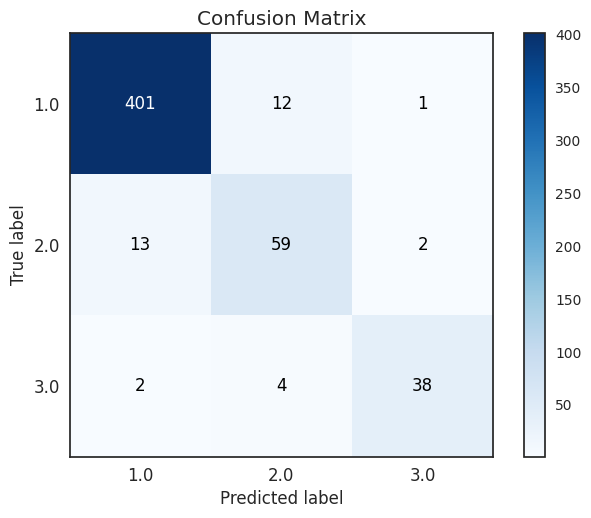

In [ ]:
print('Relatório de Classificação:\n', classification_report(test_preds['target'], test_preds['prediction_label'], digits=4))
skplt.metrics.plot_confusion_matrix(test_preds['target'], test_preds['prediction_label'])